# Requêter via des API avec Python

<a href="https://github.com/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/04c_API_TP.ipynb" class="github"><i class="fab fa-github"></i></a>
[![Download](https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter.png)](https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/04c_API_TP.ipynb)
[![nbviewer](https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter.png)](https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/04c_API_TP.ipynb)
[![Onyxia](https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&color=yellow?logo=Python.png)](https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?autoLaunch=true&onyxia.friendlyName=%C2%ABpython-datascience%C2%BB&init.personalInit=%C2%ABhttps%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmaster%2Fsspcloud%2Finit-jupyter.sh%C2%BB&init.personalInitArgs=%C2%ABnotebooks/course/manipulation%2004c_API_TP.ipynb%C2%BB&security.allowlist.enabled=false)<br>
[![Binder](https://img.shields.io/badge/Launch-Binder-E66581.svg?logo=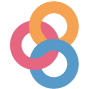.png)](https://mybinder.org/v2/gh/linogaliana/python-datascientist/master?filepath=notebooks/course/manipulation/04c_API_TP.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/04c_API_TP.ipynb)
[![githubdev](https://img.shields.io/static/v1?logo=visualstudiocode&label=&message=Open%20in%20Visual%20Studio%20Code&labelColor=2c2c32&color=007acc&logoColor=007acc.png)](https://github.dev/linogaliana/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb)

# Introduction : Qu’est-ce qu’une API ?

## Définition

Pour expliquer le principe d’une API, je vais reprendre le début de
la fiche dédiée dans la documentation collaborative
[utilitR](https://www.book.utilitr.org/api.html) que je recommande de lire :

> Une *Application Programming Interface* (ou API) est une interface de programmation qui permet d’utiliser une application existante pour restituer des données. Le terme d’API peut être paraître intimidant, mais il s’agit simplement d’une façon de mettre à disposition des données : plutôt que de laisser l’utilisateur consulter directement des bases de données (souvent volumineuses et complexes), l’API lui propose de formuler une requête qui est traitée par le serveur hébergeant la base de données, puis de recevoir des données en réponse à sa requête.
>
> D’un point de vue informatique, une API est une porte d’entrée clairement identifiée par laquelle un logiciel offre des services à d’autres logiciels (ou utilisateurs). L’objectif d’une API est de fournir un point d’accès à une fonctionnalité qui soit facile à utiliser et qui masque les détails de la mise en oeuvre. Par exemple, l’API Sirene permet de récupérer la raison sociale d’une entreprise à partir de son identifiant Siren en interrogeant le référentiel disponible sur Internet directement depuis un script R, sans avoir à connaître tous les détails du répertoire Sirene.
>
> À l’Insee comme ailleurs, la connexion entre les bases de données pour les nouveaux projets tend à se réaliser par des API. L’accès à des données par des API devient ainsi de plus en plus commun et est amené à devenir une compétence de base de tout utilisateur de données.
>
> [`utilitR`](https://www.book.utilitr.org/api.html)

## Avantages des API

A nouveau, citons la documentation [utilitR](https://www.book.utilitr.org/api.html)

Les API présentent de multiples avantages :

> -   Les API rendent les programmes plus reproductibles. En effet, grâce aux API, il est possible de mettre à jour facilement les données utilisées par un programme si celles-ci évoluent. Cette flexibilité accrue pour l’utilisateur évite au producteur de données d’avoir à réaliser de multiples extractions, et réduit le problème de la coexistence de versions différentes des données.
> -   Grâce aux API, l’utilisateur peut extraire facilement une petite partie d’une base de données plus conséquente.
> -   Les API permettent de mettre à disposition des données tout en limitant le nombre de personnes ayant accès aux bases de données elles-mêmes.
> -   Grâce aux API, il est possible de proposer des services sur mesure pour les utilisateurs (par exemple, un accès spécifique pour les gros utilisateurs).
>
> [`utilitR`](https://www.book.utilitr.org/api.html)

L’utilisation accrue d’API dans le cadre de stratégies open-data est l’un
des piliers des 15 feuilles de route ministérielles
en matière d’ouverture, de circulation et de valorisation des données publiques.

## Utilisation des API

Citons encore une fois
la documentation [`utilitR`](https://www.book.utilitr.org/api.html)

> Une API peut souvent être utilisée de deux façons : par une interface Web, et par l’intermédiaire d’un logiciel (R, Python…). Par ailleurs, les API peuvent être proposées avec un niveau de liberté variable pour l’utilisateur :
>
> -   soit en libre accès (l’utilisation n’est pas contrôlée et l’utilisateur peut utiliser le service comme bon lui semble) ;
> -   soit via la génération d’un compte et d’un jeton d’accès qui permettent de sécuriser l’utilisation de l’API et de limiter le nombre de requêtes.
>
> [`utilitR`](https://www.book.utilitr.org/api.html)

De nombreuses API nécessitent une authentification, c’est-à-dire un
compte utilisateur afin de pouvoir accéder aux données.
Dans un premier temps,
nous regarderons exclusivement les API ouvertes sans restriction d’accès.  
Certains exercices et exemples permettront néanmoins d’essayer des API
avec restrictions d’accès.

# Requêter une API

## Principe général

> L’utilisation de l’interface Web est utile dans une démarche exploratoire mais trouve rapidement ses limites, notamment lorsqu’on consulte régulièrement l’API. L’utilisateur va rapidement se rendre compte qu’il est beaucoup plus commode d’utiliser une API via un logiciel de traitement pour automatiser la consultation ou pour réaliser du téléchargement de masse. De plus, l’interface Web n’existe pas systématiquement pour toutes les API.
>
> Le mode principal de consultation d’une API consiste à adresser une requête à cette API via un logiciel adapté (R, Python, Java…). Comme pour l’utilisation d’une fonction, l’appel d’une API comprend des paramètres qui sont détaillées dans la documentation de l’API.
>
> [`utilitR`](https://www.book.utilitr.org/api.html)

Voici les éléments importants à avoir en tête sur les requêtes (j’emprunte encore
à [`utilitR`](https://www.book.utilitr.org/api.html)):

-   Le **point d’entrée** d’un service offert par une API se présente sous la forme d’une URL (adresse web). Chaque service proposé par une API a sa propre URL. Par exemple, dans le cas de l’OpenFood Facts,
    l’URL à utiliser pour obtenir des informations sur un produit particulier (l’identifiant `737628064502`) estg https://world.openfoodfacts.org/api/v0/product/737628064502.json
-   Cette URL doit être complétée avec différents paramètres qui précisent la requête (par exemple l’identifiant Siren). Ces paramètres viennent s’ajouter à l’URL, souvent à la suite de `?`. Chaque service proposé par une API a ses propres paramètres, détaillés dans la documentation.
-   Lorsque l’utilisateur soumet sa requête, l’API lui renvoie une réponse structurée contenant l’ensemble des informations demandées. Le résultat envoyé par une API est majoritairement aux formats JSON ou XML (deux formats dans lesquels les informations sont hiérarchisées de manière emboitée). Plus rarement, certains services proposent une information sous forme plate (de type csv).

Du fait de la dimension hiérarchique des formats JSON ou XML, le résultat n’est pas toujours facile à récupérer mais
`python` propose d’excellents outils pour cela (meilleurs que ceux de `R`). Certains packages, notamment `json`, facilitent l’extraction de champs d’une sortie d’API. Dans certains cas, des packages spécifiques à une API ont été créés pour simplifier l’écriture d’une requête ou la récupération du résultat. Par exemple, le package
[pynsee](https://github.com/InseeFrLab/Py-Insee-Data/tree/master/pynsee)
propose des options qui seront retranscrites automatiquement dans l’URL de
requête pour faciliter le travail sur les données Insee.

## Exemple avec l’API de la Banque Mondiale

Avec l’API de la Banque mondiale, voici comme s’écrit une requête :

> http://api.worldbank.org/v2/countries?incomeLevel=LMC

1.  Le point d’entrée est l’URL <http://api.worldbank.org/v2>
2.  Un filtre est appliqué sur les pays (`countries?`) afin de ne conserver
    que celles telles que `incomeLevel=LMC` (*“Lower middle income”*)

En cliquant sur le lien, le site renvoie des données en XML,
qui ressemblent pas mal à ce qu’on a vu plus tôt avec le scraping : une structure avec des balises qui s’ouvrent et qui se ferment.

Pour obtenir la même information en `Python`, il faut revenir aux fondamentaux : on va avoir besoin du module `requests`. Suivant les API, nous avons soit besoin de rien de plus si nous parvenons directement à obtenir un json, soit devoir utiliser un *parser* comme `BeautifulSoup` dans le cas contraire.

Avec l’API de la banque mondiale, on va utiliser le module `requests` et sa méthode `get` : on lui donne l’url de l’API qui nous intéresse, on lui demande d’en faire un json et le tour est *en apparence* joué.

In [2]:
import requests
req = requests.get('http://api.worldbank.org/v2/countries?incomeLevel=LMC')
req

<Response [200]>

Prenons par exemple les 1000 premiers caractères du résultat :

``` python
print(req.content[:1000])
```

b’<?xml version="1.0" encoding="utf-8"?><wb:countries page="1" pages="2" per_page="50" total="55" xmlns:wb="http://www.worldbank.org"><wb:country id="AGO">AO</wb:iso2Code>Angola</wb:name><wb:region id="SSF" iso2code="ZG">Sub-Saharan Africa </wb:region><wb:adminregion id="SSA" iso2code="ZF">Sub-Saharan Africa (excluding high income)</wb:adminregion><wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel><wb:lendingType id="IBD" iso2code="XF">IBRD</wb:lendingType>Luanda</wb:capitalCity></wb:longitude></wb:latitude></wb:country><wb:country id="BEN">BJ</wb:iso2Code>Benin</wb:name><wb:region id="SSF" iso2code="ZG">Sub-Saharan Africa </wb:region><wb:adminregion id="SSA" iso2code="ZF">Sub-Saharan Africa (excluding high income)</wb:adminregion>\<wb:incomeLevel id=“LMC” iso2code=“’

Quand on regarde de plus près, on voit que les informations suivantes apparaissent :

-   Code du pays
-   Nom du pays
-   Région
-   Classification en termes de revenus
-   Les types de prêt pour ces pays
-   La capitale
-   Longitude
-   Latitude

Le format XML est fortement balisé, ce qui n’est pas très pratique.
En utilisant désormais un autre URL, on obtient un JSON, plus pratique pour travailler :

> http://api.worldbank.org/v2/countries?incomeLevel=LMC&format=json

In [4]:
import requests
import pandas as pd

req = requests.get('http://api.worldbank.org/v2/countries?incomeLevel=LMC&format=json')

A nouveau, les premiers caractères sont les suivants:

``` python
print(req.content[:1000])
```

b’\[{“page”:1,“pages”:2,“per_page”:“50”,“total”:55},\[{“id”:“AGO”,“iso2Code”:“AO”,“name”:“Angola”,“region”:{“id”:“SSF”,“iso2code”:“ZG”,“value”:“Sub-Saharan Africa”},“adminregion”:{“id”:“SSA”,“iso2code”:“ZF”,“value”:“Sub-Saharan Africa (excluding high income)”},“incomeLevel”:{“id”:“LMC”,“iso2code”:“XN”,“value”:“Lower middle income”},“lendingType”:{“id”:“IBD”,“iso2code”:“XF”,“value”:“IBRD”},“capitalCity”:“Luanda”,“longitude”:“13.242”,“latitude”:“-8.81155”},{“id”:“BEN”,“iso2Code”:“BJ”,“name”:“Benin”,“region”:{“id”:“SSF”,“iso2code”:“ZG”,“value”:“Sub-Saharan Africa”},“adminregion”:{“id”:“SSA”,“iso2code”:“ZF”,“value”:“Sub-Saharan Africa (excluding high income)”},“incomeLevel”:{“id”:“LMC”,“iso2code”:“XN”,“value”:“Lower middle income”},“lendingType”:{“id”:“IDX”,“iso2code”:“XI”,“value”:“IDA”},“capitalCity”:“Porto-Novo”,“longitude”:“2.6323”,“latitude”:“6.4779”},{“id”:“BGD”,“iso2Code”:“BD”,“name”:“Bangladesh”,“region”:{“id”:“SAS”,“iso2code”:“8S”,“value”:“South Asia”},“adminregion”:{“id”:“SAS”,“iso2’

Cela ressemble déjà plus à un dictionnaire `Python`[1].

Ici, il n’est même pas nécessaire en première approche
d’utiliser le package `json`, l’information
étant déjà tabulée dans l’écho renvoyé (on a la même information pour tous les pays):

[1] Le JSON est un format très apprécié dans le domaine du *big data*
car il permet de stocker de manière intelligente des données
de structures diverses. Il
s’agit d’un des formats privilégiés du paradigme No-SQL pour lequel
cet [excellent cours](http://b3d.bdpedia.fr/) propose plus de détails

In [6]:
wb = req.json()
wb = pd.json_normalize(wb[1])
wb.head(5)

,id,iso2Code,name,capitalCity,longitude,latitude,region.id,region.iso2code,region.value,adminregion.id,adminregion.iso2code,adminregion.value,incomeLevel.id,incomeLevel.iso2code,incomeLevel.value,lendingType.id,lendingType.iso2code,lendingType.value
0,AGO,AO,Angola,Luanda,13.242,-8.81155,SSF,ZG,Sub-Saharan Africa,SSA,ZF,Sub-Saharan Africa (excluding high income),LMC,XN,Lower middle income,IBD,XF,IBRD
1,BEN,BJ,Benin,Porto-Novo,2.6323,6.4779,SSF,ZG,Sub-Saharan Africa,SSA,ZF,Sub-Saharan Africa (excluding high income),LMC,XN,Lower middle income,IDX,XI,IDA
2,BGD,BD,Bangladesh,Dhaka,90.4113,23.7055,SAS,8S,South Asia,SAS,8S,South Asia,LMC,XN,Lower middle income,IDX,XI,IDA
3,BLZ,BZ,Belize,Belmopan,-88.7713,17.2534,LCN,ZJ,Latin America & Caribbean,LAC,XJ,Latin America & Caribbean (excluding high income),LMC,XN,Lower middle income,IBD,XF,IBRD
4,BOL,BO,Bolivia,La Paz,-66.1936,-13.9908,LCN,ZJ,Latin America & Caribbean,LAC,XJ,Latin America & Caribbean (excluding high income),LMC,XN,Lower middle income,IBD,XF,IBRD


Cependant, si on regarde la dimension de l’objet obtenu, on obtient un
chiffre rond (50 lignes). Ceci est suspect et un petit tour dans la
documentation de l’API nous apprendrait que c’est le nombre maximal de
retour possible. Il faut donc faire attention à la documentation et
ajouter un paramètre `page=2` pour rattraper les derniers échos:

In [7]:
wb2 = pd.json_normalize(
    requests.get("http://api.worldbank.org/v2/countries?incomeLevel=LMC&format=json&page=2").json()[1]
    )
pd.concat([wb, wb2])

,id,iso2Code,name,capitalCity,longitude,latitude,region.id,region.iso2code,region.value,adminregion.id,adminregion.iso2code,adminregion.value,incomeLevel.id,incomeLevel.iso2code,incomeLevel.value,lendingType.id,lendingType.iso2code,lendingType.value
0,AGO,AO,Angola,Luanda,13.242,-8.81155,SSF,ZG,Sub-Saharan Africa,SSA,ZF,Sub-Saharan Africa (excluding high income),LMC,XN,Lower middle income,IBD,XF,IBRD
1,BEN,BJ,Benin,Porto-Novo,2.6323,6.4779,SSF,ZG,Sub-Saharan Africa,SSA,ZF,Sub-Saharan Africa (excluding high income),LMC,XN,Lower middle income,IDX,XI,IDA
2,BGD,BD,Bangladesh,Dhaka,90.4113,23.7055,SAS,8S,South Asia,SAS,8S,South Asia,LMC,XN,Lower middle income,IDX,XI,IDA
3,BLZ,BZ,Belize,Belmopan,-88.7713,17.2534,LCN,ZJ,Latin America & Caribbean,LAC,XJ,Latin America & Caribbean (excluding high income),LMC,XN,Lower middle income,IBD,XF,IBRD
4,BOL,BO,Bolivia,La Paz,-66.1936,-13.9908,LCN,ZJ,Latin America & Caribbean,LAC,XJ,Latin America & Caribbean (excluding high income),LMC,XN,Lower middle income,IBD,XF,IBRD
5,BTN,BT,Bhutan,Thimphu,89.6177,27.5768,SAS,8S,South Asia,SAS,8S,South Asia,LMC,XN,Lower middle income,IDX,XI,IDA
6,CIV,CI,Cote d'Ivoire,Yamoussoukro,-4.0305,5.332,SSF,ZG,Sub-Saharan Africa,SSA,ZF,Sub-Saharan Africa (excluding high income),LMC,XN,Lower middle income,IDX,XI,IDA
7,CMR,CM,Cameroon,Yaounde,11.5174,3.8721,SSF,ZG,Sub-Saharan Africa,SSA,ZF,Sub-Saharan Africa (excluding high income),LMC,XN,Lower middle income,IDB,XH,Blend
8,COG,CG,"Congo, Rep.",Brazzaville,15.2662,-4.2767,SSF,ZG,Sub-Saharan Africa,SSA,ZF,Sub-Saharan Africa (excluding high income),LMC,XN,Lower middle income,IDB,XH,Blend
9,COM,KM,Comoros,Moroni,43.2418,-11.6986,SSF,ZG,Sub-Saharan Africa,SSA,ZF,Sub-Saharan Africa (excluding high income),LMC,XN,Lower middle income,IDX,XI,IDA


Si on regarde l’information présente dans le DataFrame, on voit qu’elle se
présente sous forme `lendingType.value`. C’est parce que `pandas` a
concaténé les différents niveaux de notre dictionnaire. Si on désire
s’en assurer, on peut regarder sur un exemple:

In [8]:
req.json()[1][0]['incomeLevel']['value'] == wb.loc[0, 'incomeLevel.value'] 

True

## Un catalogue incomplet d’API existantes

De plus en plus de sites mettent des API à disposition des développeurs et autres curieux.

Pour en citer quelques-unes très connues :

-   Twitter <i class="fab fa-twitter"></i> : https://dev.twitter.com/rest/public
-   Facebook <i class="fab fa-facebook"></i> : https://developers.facebook.com/
-   Instagram <i class="fab fa-instagram"></i> : https://www.instagram.com/developer/
-   Spotify <i class="fab fa-spotify"></i> : https://developer.spotify.com/web-api/

Cependant, il est intéressant de ne pas se restreindre à celles-ci dont les
données ne sont pas toujours les plus intéressantes. Beaucoup
de producteurs de données, privés comme publics, mettent à disposition
leurs données sous forme d’API

-   [API gouv](https://api.gouv.fr/): beaucoup d’API officielles de l’Etat français
    et accès à de la documentation
-   Insee: https://api.insee.fr/catalogue/ et [`pynsee`](https://github.com/InseeFrLab/Py-Insee-Data/tree/master/pynsee)
-   Pole Emploi : https://www.emploi-store-dev.fr/portail-developpeur-cms/home.html
-   SNCF : https://data.sncf.com/api
-   Banque Mondiale : https://datahelpdesk.worldbank.org/knowledgebase/topics/125589

# L’API DVF : accéder à des données de transactions immobilières simplement

Le site `DVF` (demandes de valeurs foncières) permet de visualiser toutes les données relatives aux mutations à titre onéreux (ventes de maisons, appartements, garages…) réalisées durant les 5 dernières années.

Un site de visualisation est disponible sur <https://app.dvf.etalab.gouv.fr/>.

Ce site est très complet quand il s’agit de connaître le prix moyen au mètre
carré d’un quartier ou de comparer des régions entre elles.
L’API DVF permet d’aller plus loin afin de récupérer les résultats dans
un logiciel de traitement de données. Elle a été réalisée par
[Christian Quest](https://github.com/cquest) et le code
source est disponible sur Github <a href="https://github.com/cquest/dvf_as_api" class="github"><i class="fab fa-github"></i></a>.

Les critères de recherche sont les suivants :
- `code_commune` = code INSEE de la commune (ex: 94068)
- `section` = section cadastrale (ex: 94068000CQ)
- `numero_plan` = identifiant de la parcelle, (ex: 94068000CQ0110)
- `lat` + `lon` + `dist` (optionnel): pour une recherche géographique, dist est par défaut un rayon de 500m
- `code_postal`

Les filtres de sélection complémentaires :
- `nature_mutation` (Vente, etc)
- `type_local` (Maison, Appartement, Local, Dépendance)

{{% box status=“exercise” title=“Exercice” icon=“fas fa-pencil-alt” %}}

**Exercice 1 : Exploiter l’API DVF**

:one:
Rechercher toutes les transactions existantes dans DVF à Plogoff (code commune `29168`, en Bretagne).
Afficher les clés du JSON et en déduire le nombre de transactions répertoriées.

:two:
N’afficher que les transactions portant sur des maisons. Le résultat devrait
ressembler au DataFrame suivant:

,code_service_ch,reference_document,articles_1,articles_2,articles_3,articles_4,articles_5,numero_disposition,date_mutation,nature_mutation,...,identifiant_local,surface_relle_bati,nombre_pieces_principales,nature_culture,nature_culture_speciale,surface_terrain,lat,lon,geom.type,geom.coordinates
0,None,None,None,None,None,None,None,000001,2015-06-25,Vente,...,None,90,4,S,None,277,48.042047,-4.705626,Point,"[-4.705626, 48.042047]"
1,None,None,None,None,None,None,None,000001,2015-09-12,Vente,...,None,90,4,S,None,615,48.038356,-4.709215,Point,"[-4.709215, 48.038356]"
2,None,None,None,None,None,None,None,000001,2015-05-23,Vente,...,None,50,3,S,None,170,48.038782,-4.709152,Point,"[-4.709152, 48.038782]"
3,None,None,None,None,None,None,None,000001,2018-09-28,Vente,...,None,67,3,S,None,610,48.038467,-4.708496,Point,"[-4.708496, 48.038467]"
4,None,None,None,None,None,None,None,000001,2016-03-19,Vente,...,None,108,5,S,None,251,48.038626,-4.708192,Point,"[-4.708192, 48.038626]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,None,None,None,None,None,None,None,000001,2019-03-22,Vente,...,None,77,3,S,None,273,48.039692,-4.702070,Point,"[-4.70207, 48.039692]"
130,None,None,None,None,None,None,None,000001,2018-09-15,Vente,...,None,70,6,S,None,672,48.039420,-4.699823,Point,"[-4.699823, 48.03942]"
131,None,None,None,None,None,None,None,000001,2018-09-26,Vente,...,None,98,7,S,None,455,48.038956,-4.700808,Point,"[-4.700808, 48.038956]"
132,None,None,None,None,None,None,None,000001,2015-07-11,Vente,...,None,48,4,S,None,625,48.037184,-4.700004,Point,"[-4.700004, 48.037184]"


:three: Utiliser l’[API geo](https://api.gouv.fr/documentation/api-geo) pour
récupérer le découpage communal de la ville de Plogoff

ERROR 1: PROJ: proj_create_from_database: Open of /miniconda/envs/python-ENSAE/share/proj failed

,nom,code,codeDepartement,codeRegion,population,geometry
0,Plogoff,29168,29,53,1230,"MULTIPOLYGON (((-4.72457 48.03243, -4.72454 48..."


:four:
Représenter l’histogramme des prix de vente

N’hésitez pas à aller plus loin en jouant sur des variables de
groupes par exemple

:five:
On va faire une carte des ventes en affichant le prix de l’achat.

Supposons que le DataFrame des ventes s’appelle `ventes`. Il faut d’abord le
convertir
en objet `geopandas`.

In [13]:
ventes = ventes.dropna(subset = ['lat','lon'])
ventes = gpd.GeoDataFrame(ventes, geometry=gpd.points_from_xy(ventes.lon, ventes.lat))
ventes

,code_service_ch,reference_document,articles_1,articles_2,articles_3,articles_4,articles_5,numero_disposition,date_mutation,nature_mutation,...,nombre_pieces_principales,nature_culture,nature_culture_speciale,surface_terrain,lat,lon,geom.type,geom.coordinates,geom,geometry
0,None,None,None,None,None,None,None,000001,2017-09-29,Vente,...,0.0,None,None,NaN,48.037810,-4.717967,Point,"[-4.717967, 48.03781]",NaN,POINT (-4.71797 48.03781)
1,None,None,None,None,None,None,None,000001,2018-07-29,Vente,...,0.0,None,None,NaN,48.037810,-4.717967,Point,"[-4.717967, 48.03781]",NaN,POINT (-4.71797 48.03781)
2,None,None,None,None,None,None,None,000001,2014-10-30,Vente,...,NaN,T,None,1240.0,48.042296,-4.709488,Point,"[-4.709488, 48.042296]",NaN,POINT (-4.70949 48.04230)
3,None,None,None,None,None,None,None,000001,2014-10-30,Vente,...,NaN,T,None,630.0,48.043125,-4.706963,Point,"[-4.706963, 48.043125]",NaN,POINT (-4.70696 48.04313)
4,None,None,None,None,None,None,None,000001,2015-06-25,Vente,...,NaN,J,None,78.0,48.042232,-4.705553,Point,"[-4.705553, 48.042232]",NaN,POINT (-4.70555 48.04223)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,None,None,None,None,None,None,None,000001,2015-09-01,Vente,...,NaN,T,None,1595.0,48.037084,-4.712427,Point,"[-4.712427, 48.037084]",NaN,POINT (-4.71243 48.03708)
435,None,None,None,None,None,None,None,000001,2015-09-01,Vente,...,4.0,S,None,555.0,48.037312,-4.712316,Point,"[-4.712316, 48.037312]",NaN,POINT (-4.71232 48.03731)
436,None,None,None,None,None,None,None,000001,2015-09-01,Vente,...,0.0,S,None,555.0,48.037312,-4.712316,Point,"[-4.712316, 48.037312]",NaN,POINT (-4.71232 48.03731)
437,None,None,None,None,None,None,None,000001,2015-09-01,Vente,...,NaN,T,None,595.0,48.037271,-4.711856,Point,"[-4.711856, 48.037271]",NaN,POINT (-4.71186 48.03727)


Avant de faire une carte, on va convertir
les limites de la commune de Plogoff en geoJSON pour faciliter
sa représentation avec `folium`
([voir la doc `geopandas` à ce propos](https://geopandas.readthedocs.io/en/latest/gallery/polygon_plotting_with_folium.html#Add-polygons-to-map)):

In [14]:
geo_j = plgf.to_json()

Pour représenter graphiquement, on peut utiliser le code suivant (essayez de
le comprendre et pas uniquement de l’exécuter).

In [15]:
import folium
import numpy as np

ventes['map_color'] = pd.qcut(ventes['valeur_fonciere'], [0,0.8,1], labels = ['lightblue','red'])
ventes['icon'] = np.where(ventes['type_local']== 'Maison', "home", "")
ventes['num_voie_clean'] = np.where(ventes['numero_voie'].isnull(), "", ventes['numero_voie'])
ventes['text'] = ventes.apply(lambda s: "Adresse: {num} {voie} <br>Vente en {annee} <br>Prix {prix:.0f} €".format(
                        num = s['num_voie_clean'],
                        voie = s["voie"],
                        annee = s['date_mutation'].split("-")[0],
                        prix = s["valeur_fonciere"]),
             axis=1)
             
center = ventes[['lat', 'lon']].mean().values.tolist()
sw = ventes[['lat', 'lon']].min().values.tolist()
ne = ventes[['lat', 'lon']].max().values.tolist()

m = folium.Map(location = center, tiles='Stamen Toner')

# I can add marker one by one on the map
for i in range(0,len(ventes)):
    folium.Marker([ventes.iloc[i]['lat'], ventes.iloc[i]['lon']],
                  popup=ventes.iloc[i]['text'],
                  icon=folium.Icon(color=ventes.iloc[i]['map_color'], icon=ventes.iloc[i]['icon'])).add_to(m)

m.fit_bounds([sw, ne])

In [16]:
# Afficher la carte
m

{{% /box %}}

{{\< rawhtml \>}}

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<head> 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.6.0/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-1.12.4.min.js"></script>
 <script src="https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/js/bootstrap.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.6.0/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap-theme.min.css"/>
 <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/font-awesome/4.6.3/css/font-awesome.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_c77ce882fd8c3ba2c9e50e1ed8a9bc5b {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 </style>
 
</head>
<body> 
 
 <div class="folium-map" id="map_c77ce882fd8c3ba2c9e50e1ed8a9bc5b" ></div>
 
</body>
<script> 
 
 var map_c77ce882fd8c3ba2c9e50e1ed8a9bc5b = L.map(
 "map_c77ce882fd8c3ba2c9e50e1ed8a9bc5b",
 {
 center: [48.03477472157772, -4.671743032482598],
 crs: L.CRS.EPSG3857,
 zoom: 10,
 zoomControl: true,
 preferCanvas: false,
 }
 );

 

 
 
 var tile_layer_b36b74e2042f520776b1befacbe65049 = L.tileLayer(
 "https://stamen-tiles-{s}.a.ssl.fastly.net/toner/{z}/{x}/{y}.png",
 {"attribution": "Map tiles by \u003ca href=\"http://stamen.com\"\u003eStamen Design\u003c/a\u003e, under \u003ca href=\"http://creativecommons.org/licenses/by/3.0\"\u003eCC BY 3.0\u003c/a\u003e. Data by \u0026copy; \u003ca href=\"http://openstreetmap.org\"\u003eOpenStreetMap\u003c/a\u003e, under \u003ca href=\"http://www.openstreetmap.org/copyright\"\u003eODbL\u003c/a\u003e.", "detectRetina": false, "maxNativeZoom": 18, "maxZoom": 18, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 ).addTo(map_c77ce882fd8c3ba2c9e50e1ed8a9bc5b);
 
 
 var marker_d16fbe88baa93c7c8d99423a9599f41f = L.marker(
 [48.03781, -4.717967],
 {}
 ).addTo(map_c77ce882fd8c3ba2c9e50e1ed8a9bc5b);
 
 
 var icon_0b2d0c36a185571f78a54a1a4ad9c20c = L.AwesomeMarkers.icon(
 {"extraClasses": "fa-rotate-0", "icon": "", "iconColor": "white", "markerColor": "red", "prefix": "glyphicon"}
 );
 marker_d16fbe88baa93c7c8d99423a9599f41f.setIcon(icon_0b2d0c36a185571f78a54a1a4ad9c20c);
 
 
 var popup_bf322f23abebff36d889a51f194b0358 = L.popup({"maxWidth": "100%"});

 
 var html_d102c2ab3ed3727156347c83f3811571 = $(`<div id="html_d102c2ab3ed3727156347c83f3811571" style="width: 100.0%; height: 100.0%;">Adresse: 5215 LA POINTE DU RAZ <br>Vente en 2017 <br>Prix 176000 €</div>`)[0];
 popup_bf322f23abebff36d889a51f194b0358.setContent(html_d102c2ab3ed3727156347c83f3811571);
 

 marker_d16fbe88baa93c7c8d99423a9599f41f.bindPopup(popup_bf322f23abebff36d889a51f194b0358)
 ;

 
 
 
 var marker_714d195a0691eeefc7cdd45ece3f93f2 = L.marker(
 [48.03781, -4.717967],
 {}
 ).addTo(map_c77ce882fd8c3ba2c9e50e1ed8a9bc5b);
 
 
 var icon_a3a6fbd266f20c80a99161b8bb51e580 = L.AwesomeMarkers.icon(
 {"extraClasses": "fa-rotate-0", "icon": "", "iconColor": "white", "markerColor": "lightblue", "prefix": "glyphicon"}
 );
 marker_714d195a06

{{\< /rawhtml \>}}

# Géocoder des données grâce aux API officielles

Jusqu’à présent, nous avons travaillés sur des données où la dimension
géographique était déjà présente ou relativement facile à intégrer.

Ce cas idéal ne se rencontre pas nécessairement dans la pratique.
On dispose parfois de localisations plus ou moins précises et plus ou
moins bien formattées pour déterminer la localisation de certains
lieux.

Depuis quelques années, un service officiel de géocodage a été mis en place.
Celui-ci est gratuit et permet de manière efficace de coder des adresses
à partir d’une API. Cette API, connue sous le nom de la Base d’Adresses Nationale
(BAN) a bénéficié de la mise en commun de données de plusieurs
acteurs (collectivités locales, Poste) et de compétences d’acteurs
comme Etalab. La documentation de celle-ci est disponible à l’adresse
https://api.gouv.fr/les-api/base-adresse-nationale

Pour illustrer la manière de géocoder des données avec `Python`, nous
allons partir de la base
[des résultats des auto-écoles à l’examen du permis sur l’année 2018](https://www.data.gouv.fr/fr/datasets/taux-de-reussite-auto-ecole-par-auto-ecole-en-2018/).

Ces données nécessitent un petit peu de travail pour être propres à une
analyse statistique. Après avoir renommé les colonnes, nous n’allons conserver que
les informations relatives au permis B (permis voiture classique) et
les auto-écoles ayant présenté au moins 20 personnes à l’examen.

In [18]:
import pandas as pd
import xlrd
import geopandas as gpd

df = pd.read_excel("https://www.data.gouv.fr/fr/datasets/r/d4b6b072-8a7d-4e04-a029-8cdbdbaf36a5", header = [0,1])

index_0 = ["" if df.columns[i][0].startswith("Unnamed") else df.columns[i][0] for i in range(len(df.columns))]
index_1 = [df.columns[i][1] for i in range(len(df.columns))]
keep_index = [True if el in ('', "B") else False for el in index_0] 

cols = [index_0[i] + " " + index_1[i].replace("+", "_") for i in range(len(df.columns))]
df.columns = cols
df = df.loc[:, keep_index]
df.columns = df.columns.str.replace("(^ |°)", "", regex = True).str.replace(" ", "_")
df = df.dropna(subset = ['B_NB'])
df = df.loc[~df["B_NB"].astype(str).str.contains("(\%|\.)"),:]

df['B_NB'] = df['B_NB'].astype(int)
df['B_TR'] = df['B_TR'].str.replace(",", ".").str.replace("%","").astype(float)

df = df.loc[df["B_NB"]>20]

/tmp/ipykernel_391/1059845781.py:16: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.


Sur cet échantillon, le taux de réussite moyen était, en 2018, de 58.02%

Nos informations géographiques prennent la forme suivante:

In [20]:
df.loc[:,['Adresse','CP','Ville']].head(5)

,Adresse,CP,Ville
0,56 RUE CHARLES ROBIN,01000,BOURG EN BRESSE
2,"7, avenue Revermont",01250,Ceyzeriat
3,72 PLACE DE LA MAIRIE,01000,SAINT-DENIS LES BOURG
4,6 RUE DU LYCEE,01000,BOURG EN BRESSE
5,9 place Edgard Quinet,01000,BOURG EN BRESSE


Autrement dit, nous disposons d’une adresse, d’un code postal et d’un nom
de ville. Ces informations peuvent servir à faire une recherche
sur la localisation d’une auto-école.

## Utiliser l’API BAN

La [documentation officielle de l’API](https://adresse.data.gouv.fr/api-doc/adresse)
propose un certain nombre d’exemples de manière de géolocaliser des données.
Dans notre situation, deux points d’entrée paraissent intéressants:

-   L’API `/search/` qui représente un point d’entrée avec des URL de la forme
    https://api-adresse.data.gouv.fr/search/?q=\<adresse\>&postcode=\<codepostal\>&limit=1
-   L’API `/search/csv` qui prend un CSV en entrée et retourne ce même CSV avec
    les observations géocodées. La requête prend la forme suivante, en apparence
    moins simple à mettre en oeuvre :
    `curl -X POST -F data=@search.csv -F columns=adresse -F columns=postcode https://api-adresse.data.gouv.fr/search/csv/`

La tentation serait forte d’utiliser la première méthode avec une boucle sur les
lignes de notre DataFrame pour géocoder l’ensemble de notre jeu de données.
Cela serait néanmoins une mauvaise idée car les communications entre notre
session Python et les serveurs de l’API seraient beaucoup trop nombreuses
pour offrir des performances satisfaisantes.

Pour vous en convaincre, vous pouvez exécuter le code suivant sur un petit
échantillon de données (par exemple 100 comme ici) et remarquer que le temps
d’exécution est assez important

In [21]:
import time

dfgeoloc = df.loc[:, ['Adresse','CP','Ville']].apply(lambda s: s.str.lower().str.replace(","," "))
dfgeoloc['url'] = (dfgeoloc['Adresse'] + "+" + dfgeoloc['Ville'].str.replace("-",'+')).str.replace(" ","+")
dfgeoloc['url'] = 'https://api-adresse.data.gouv.fr/search/?q=' + dfgeoloc['url'] + "&postcode=" + df['CP'] + "&limit=1"
dfgeoloc = dfgeoloc.dropna()

start_time = time.time()

def get_geoloc(i):
    print(i)
    return gpd.GeoDataFrame.from_features(requests.get(dfgeoloc['url'].iloc[i]).json()['features'])

local = [get_geoloc(i) for i in range(len(dfgeoloc.head(10)))]
print("--- %s seconds ---" % (time.time() - start_time))

Comme l’indique la documentation, si on désire industrialiser notre processus
de géocodage, on va privilégier l’API CSV.

Pour obtenir une requête CURL cohérente avec le format désiré par l’API
on va à nouveau utiliser `requests` mais cette fois avec des paramètres
supplémentaires:

-   `data` va nous permettre de passer des paramètres à CURL (équivalents aux `-F`
    de la requête CURL):
    -   `columns`: Les colonnes utilisées pour localiser une donnée. En l’occurrence,
        on utilise l’adresse et la ville (car les codes postaux n’étant pas uniques,
        un même nom de voirie peut se trouver dans plusieurs villes partageant le même
        code postal)
    -   `postcode`: Le code postal de la ville. Idéalement nous aurions utilisé
        le code Insee mais nous ne l’avons pas dans nos données.
    -   `result_columns`: on restreint les données échangées avec l’API aux
        colonnes qui nous intéressent. Cela permet d’accélérer les processus (on
        échange moins de données) et de réduire l’impact carbone de notre activité
        (moins de transferts = moins d’énergie dépensée). En l’occurrence, on ne ressort
        que les données géolocalisées et un score de confiance en la géolocalisation.
-   `files`: permet d’envoyer un fichier via CURL

Les données sont récupérées avec `request.post`. Comme il s’agit d’une
chaîne de caractère, nous pouvons directement la lire avec `pandas` en
utilisant `io.StringIO` pour éviter d’écrire des données intermédiaires.

Le nombre d’échos semblant être limité, je propose de procéder par morceaux
(ici je découpe mon jeu de données en 5 morceaux).

In [22]:
import requests
import io   
import numpy as np
import time

params = {
    'columns': ['Adresse', 'Ville'],
    'postcode': 'CP',
    'result_columns': ['result_score', 'latitude', 'longitude'],
}

df[['Adresse','CP','Ville']] = df.loc[:, ['Adresse','CP','Ville']].apply(lambda s: s.str.lower().str.replace(","," "))

def geoloc_chunk(x):
    dfgeoloc = x.loc[:, ['Adresse','CP','Ville']]
    dfgeoloc.to_csv("datageocodage.csv", index=False)
    response = requests.post('https://api-adresse.data.gouv.fr/search/csv/', data=params, files={'data': ('datageocodage.csv', open('datageocodage.csv', 'rb'))})
    geoloc = pd.read_csv(io.StringIO(response.text), dtype = {'CP': 'str'})
    return geoloc
    
start_time = time.time()
geodata = [geoloc_chunk(dd) for dd in np.array_split(df, 10)]
print("--- %s seconds ---" % (time.time() - start_time))

--- 82.43258357048035 seconds ---

Cette méthode est beaucoup plus rapide et permet ainsi, une fois retourné à nos
données initiales, d’avoir un jeu de données géolocalisé

In [23]:
geodata = pd.concat(geodata, ignore_index = True)
df_xy = df.merge(geodata, on = ['Adresse','CP','Ville'])
df_xy = df_xy.dropna(subset = ['latitude','longitude'])
df_xy['text'] = df_xy['Raison_Sociale'] + '<br>' + df_xy['Adresse'] + '<br>' + df_xy['Ville'] + '<br>Nombre de candidats:' + df_xy['B_NB'].astype(str)

df_xy.filter(['Raison_Sociale','Adresse','CP','Ville','latitude','longitude'], axis = "columns").sample(10)

,Raison_Sociale,Adresse,CP,Ville,latitude,longitude
5003,B.CARS FORMATION EURL,6 bis avenue de la république,60000,beauvais,49.427158,2.084279
8905,DANY,95 avenue de la republique,91230,montgeron,48.704759,2.460538
5319,ALBAIN,16 boulevard daunou,62200,boulogne-sur-mer,50.718697,1.610343
6682,Entreprise LAUROT Valérie,178 avenue du mont cenis,73300,st jean de maurienne,45.273317,6.349004
10268,RAMASSAMY FORMATION,72 rue ernest desproge,97200,fort de france,14.603743,-61.071638
5684,CUSSONNEAU,1 bis av georges moutete 06 07 45 00 17,64300,orthez,43.489903,-0.769808
614,FOURAS,66 bd allard,17450,rochefort,45.988972,-1.093716
9191,ECR FAJE,140 grande rue,92310,sevres,48.821912,2.205475
6408,GR JLM auto-école,7 quai mavia,70100,gray,47.449296,5.586388
9246,FCR LE SUBLIME,1 avenue de la redoute,92600,asnieres sur seine,48.927066,2.273515


Il ne reste plus qu’à utiliser `geopandas`
et nous serons en mesure de faire une carte des localisations des auto-écoles :

In [24]:
import geopandas as gpd
dfgeo = gpd.GeoDataFrame(df_xy, geometry=gpd.points_from_xy(df_xy.longitude, df_xy.latitude))

Nous allons représenter les stations dans l’Essonne avec un zoom initialement
sur les villes de Massy et Palaiseau. Le code est le suivant:

In [25]:
import folium

# Représenter toutes les autoécoles de l'Essonne
df_91 = df_xy.loc[df_xy["Dept"] == "091"]

# Centrer la vue initiale sur Massy-Palaiseau
df_pal = df_xy.loc[df_xy['Ville'].isin(["massy", "palaiseau"])]
center = df_pal[['latitude', 'longitude']].mean().values.tolist()
sw = df_pal[['latitude', 'longitude']].min().values.tolist()
ne = df_pal[['latitude', 'longitude']].max().values.tolist()

m = folium.Map(location = center, tiles='Stamen Toner')

# I can add marker one by one on the map
for i in range(0,len(df_91)):
    folium.Marker([df_91.iloc[i]['latitude'], df_91.iloc[i]['longitude']],
                  popup=df_91.iloc[i]['text'],
                  icon=folium.Icon(icon='car', prefix='fa')).add_to(m)

m.fit_bounds([sw, ne])

Ce qui permet d’obtenir la carte:

{{\< rawhtml \>}}

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<head> 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.6.0/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-1.12.4.min.js"></script>
 <script src="https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/js/bootstrap.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.6.0/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap-theme.min.css"/>
 <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/font-awesome/4.6.3/css/font-awesome.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_31b1aa315e083c3bef37e27b41922110 {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 </style>
 
</head>
<body> 
 
 <div class="folium-map" id="map_31b1aa315e083c3bef37e27b41922110" ></div>
 
</body>
<script> 
 
 var map_31b1aa315e083c3bef37e27b41922110 = L.map(
 "map_31b1aa315e083c3bef37e27b41922110",
 {
 center: [48.719988769230774, 2.255833230769231],
 crs: L.CRS.EPSG3857,
 zoom: 10,
 zoomControl: true,
 preferCanvas: false,
 }
 );

 

 
 
 var tile_layer_736a2c5c26e4867fbf855bfd8f72f17a = L.tileLayer(
 "https://stamen-tiles-{s}.a.ssl.fastly.net/toner/{z}/{x}/{y}.png",
 {"attribution": "Map tiles by \u003ca href=\"http://stamen.com\"\u003eStamen Design\u003c/a\u003e, under \u003ca href=\"http://creativecommons.org/licenses/by/3.0\"\u003eCC BY 3.0\u003c/a\u003e. Data by \u0026copy; \u003ca href=\"http://openstreetmap.org\"\u003eOpenStreetMap\u003c/a\u003e, under \u003ca href=\"http://www.openstreetmap.org/copyright\"\u003eODbL\u003c/a\u003e.", "detectRetina": false, "maxNativeZoom": 18, "maxZoom": 18, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 ).addTo(map_31b1aa315e083c3bef37e27b41922110);
 
 
 var marker_99008722145bdda393615c8e9599078e = L.marker(
 [48.588546, 2.452578],
 {}
 ).addTo(map_31b1aa315e083c3bef37e27b41922110);
 
 
 var icon_49278853827f2ba0c2d4b60dc56b7408 = L.AwesomeMarkers.icon(
 {"extraClasses": "fa-rotate-0", "icon": "car", "iconColor": "white", "markerColor": "blue", "prefix": "fa"}
 );
 marker_99008722145bdda393615c8e9599078e.setIcon(icon_49278853827f2ba0c2d4b60dc56b7408);
 
 
 var popup_181be80c8e29a963e48cfc7f1ab56d56 = L.popup({"maxWidth": "100%"});

 
 var html_cf36886a9a4d062ea0c5ec5cf85855dd = $(`<div id="html_cf36886a9a4d062ea0c5ec5cf85855dd" style="width: 100.0%; height: 100.0%;">GENERALISTE<br>route de lisses<br>villabe<br>Nombre de candidats:46</div>`)[0];
 popup_181be80c8e29a963e48cfc7f1ab56d56.setContent(html_cf36886a9a4d062ea0c5ec5cf85855dd);
 

 marker_99008722145bdda393615c8e9599078e.bindPopup(popup_181be80c8e29a963e48cfc7f1ab56d56)
 ;

 
 
 
 var marker_f294118160ead8acf12021d2d9d8bb2d = L.marker(
 [48.697171, 2.522375],
 {}
 ).addTo(map_31b1aa315e083c3bef37e27b41922110);
 
 
 var icon_5b9c4e0c902f1cc0cf5c429f7eb59c47 = L.AwesomeMarkers.icon(
 {"extraClasses": "fa-rotate-0", "icon": "car", "iconColor": "white", "markerColor": "blue", "prefix": "fa"}
 );
 marker_f294118160ead8acf1202

{{\< /rawhtml \>}}

Vous pouvez aller plus loin avec l’exercice suivant

{{% box status=“exercise” title=“Exercise” icon=“fas fa-pencil-alt” %}}

**Quelles sont les auto-écoles les plus proches de chez moi ?**

On va supposer que vous cherchez, dans un rayon donné autour d’un centre ville,
les auto-écoles disponibles.

:one: Pour commencer, utiliser l’[API geo](https://geo.api.gouv.fr/decoupage-administratif)

:two: Voici une fonction pour créer un cercle autour d’un point (source [ici](https://gis.stackexchange.com/questions/289044/creating-buffer-circle-x-kilometers-from-point-using-python/289923))

In [28]:
from functools import partial
import pyproj
from shapely.ops import transform
from shapely.geometry import Point

proj_wgs84 = pyproj.Proj('+proj=longlat +datum=WGS84')


def geodesic_point_buffer(lat, lon, km):
    # Azimuthal equidistant projection
    aeqd_proj = '+proj=aeqd +lat_0={lat} +lon_0={lon} +x_0=0 +y_0=0'
    project = partial(
        pyproj.transform,
        pyproj.Proj(aeqd_proj.format(lat=lat, lon=lon)),
        proj_wgs84)
    buf = Point(0, 0).buffer(km * 1000)  # distance in metres
    return transform(project, buf).exterior.coords[:]

L’appliquer au centre ville de Palaiseau

:three: Pour se convaincre, on peut représenter une carte

<AxesSubplot:>

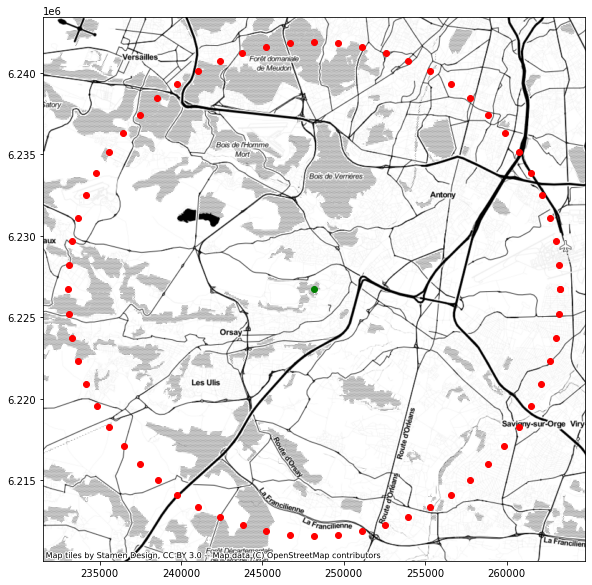

In [30]:
import matplotlib.pyplot as plt
import contextily as ctx

fig,ax = plt.subplots(figsize=(10, 10))
circle.to_crs("EPSG:3857").plot(ax = ax, color = 'red')
pal.to_crs("EPSG:3857").plot(ax = ax, color = 'green')
ctx.add_basemap(ax, source = ctx.providers.Stamen.Toner)
ax

On a bien un cercle centré autour de Palaiseau:

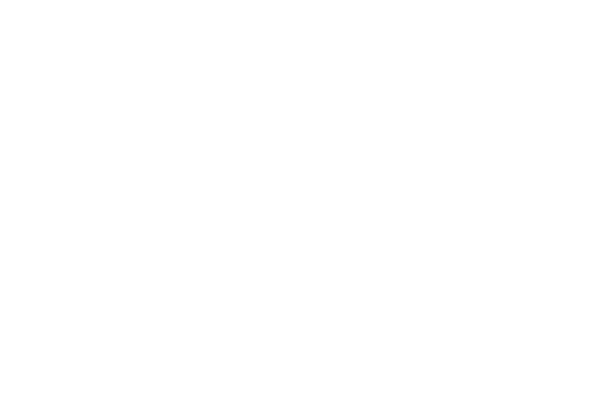

1.  *To be continued*: améliorer la constitutoin du cercle puis merge spatial

{{% /box %}}

# Exercices supplémentaires

{{% box status=“exercise” title=“Exercise” icon=“fas fa-pencil-alt” %}}

**Exercice 2 : Retrouver des produits dans l’openfood facts :pizza:**

Voici une liste de code-barres:
`3274080005003,  5449000000996, 8002270014901, 3228857000906, 3017620421006, 8712100325953`

Utiliser l’[API d’openfoodfacts](https://world.openfoodfacts.org/data)
(l’API, pas depuis le CSV !)
pour retrouver les produits correspondant
et leurs caractéristiques nutritionnelles.

Le panier paraît-il équilibré ? :chocolate_bar:

Pour vous aidez, vous pouvez regarder une exemple de structure du json ici : https://world.openfoodfacts.org/api/v0/product/3274080005003.json en particulier la catégorie `nutriments`.

Récupérer l’URL d’une des images et l’afficher dans votre navigateur. Par exemple,
celle-ci:

![](https://images.openfoodfacts.org/images/products/544/900/000/0996/front_en.596.200.jpg)

{{% /box %}}